# A less problematic dataset

This uses a dataset that doesn't make me cringe and has a nice graph of the difference between trained and validated accuracy. This should make future neural nets easier to make. It also has a onehot categorisation of quality.

In [202]:
from math import floor

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras import activations, initializers, layers, losses, metrics, optimizers

In [203]:
df = pd.read_csv("WineQT.csv", index_col="Id")
x = df.drop(columns=["quality"])
y = df.quality.to_numpy()
y_onehot = np.eye(11)[y]  # 0 to 10

In [204]:
x_train, x_test, y_train, y_test = train_test_split(x, y_onehot, test_size=0.30)

In [205]:
max_nodes = x.shape[0] / (5 * (x.shape[1] + 1))
layer_1_units = floor((max_nodes / 3) * 2)
layer_2_units = floor(max_nodes - layer_1_units)

model = tf.keras.Sequential()
model.add(
    layers.Dense(
        layer_1_units,
        kernel_initializer=initializers.random_uniform,
        activation=activations.swish,
    )

)
model.add(
    layers.Dropout(.1)
)
model.add(
    layers.Dense(
        layer_2_units,
        kernel_initializer=initializers.random_uniform,
        activation=activations.swish,
    )
)
model.add(
    layers.Dropout(.1)
)
model.add(
    layers.Dense(
        11,
        kernel_initializer=initializers.random_uniform,
        activation=activations.softmax,
    )
)

model.compile(
    loss=losses.CategoricalCrossentropy(),
    optimizer=optimizers.Adam(),
    metrics=[
        metrics.CategoricalAccuracy(
            name='accuracy'
        )
    ]
)

In [206]:
history = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    batch_size=32,
    epochs=200,
)

Epoch 1/200
25/25 [==============================] - 1s 13ms/step - loss: 2.3662 - accuracy: 0.3862 - val_loss: 2.3015 - val_accuracy: 0.4315
Epoch 2/200
25/25 [==============================] - 0s 4ms/step - loss: 2.1059 - accuracy: 0.4375 - val_loss: 1.7030 - val_accuracy: 0.4111
Epoch 3/200
25/25 [==============================] - 0s 4ms/step - loss: 1.4965 - accuracy: 0.4062 - val_loss: 1.1708 - val_accuracy: 0.4286
Epoch 4/200
25/25 [==============================] - 0s 4ms/step - loss: 1.2896 - accuracy: 0.3900 - val_loss: 1.1393 - val_accuracy: 0.4286
Epoch 5/200
25/25 [==============================] - 0s 5ms/step - loss: 1.2819 - accuracy: 0.4087 - val_loss: 1.1338 - val_accuracy: 0.4286
Epoch 6/200
25/25 [==============================] - 0s 4ms/step - loss: 1.2748 - accuracy: 0.3938 - val_loss: 1.1321 - val_accuracy: 0.4286
Epoch 7/200
25/25 [==============================] - 0s 5ms/step - loss: 1.2575 - accuracy: 0.4100 - val_loss: 1.1353 - val_accuracy: 0.4286
Epoch 8/200


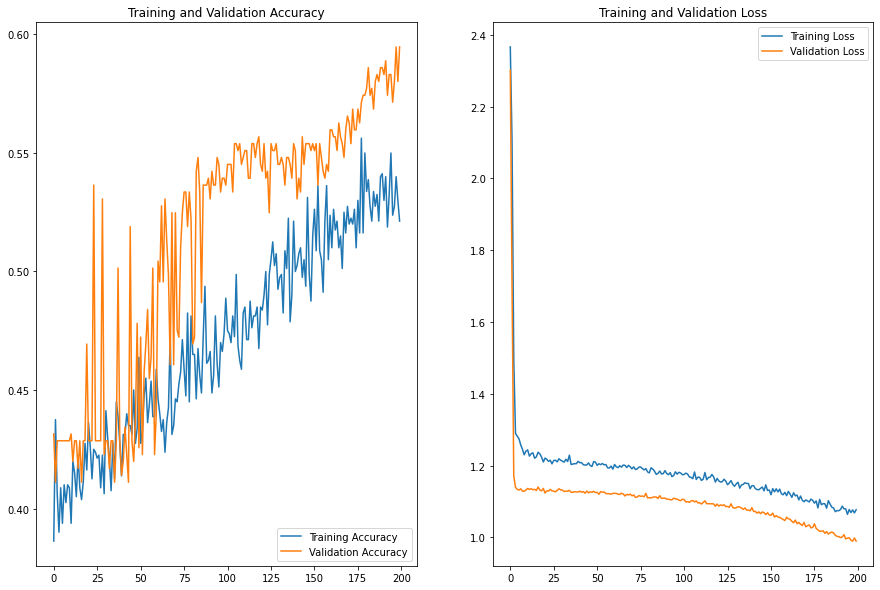

In [207]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(history.history['val_loss']))
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [208]:
evaluations = model.evaluate(x=x_test, y=y_test)
evaluations

11/11 [==============================] - 0s 781us/step - loss: 0.9900 - accuracy: 0.5948


[0.9899710416793823, 0.5947521924972534]